# Assignment 3

The objective of assignment 3 is to assess the extent to which dataset size and hyperparameter tuning affects the performance of prognostic models.
 
The learning objectives are: (1) how performance is affected by sample size, (2) how this varies by modeling technique, and (3) when hyperparameter tuning is most useful.

You will be given a large dataset and are asked to sample datasets of various sizes from it. For each sample train a machine learning model. Then plot the relationship between the sample size and the model performance. You should expect to see a power curve with better performance with larger datasets.

## Overview

The workflow of this assignment is as following:

1. The code to load and data preprocessing, including predictor selection, will be given, please do not change the corresponding code.
2. We will generate a vector of integers as the sample sizes of each subset (code will be provided).
3. Then for each dataset:
    1. Train CART and LGBM models, with and without tuning, on __all of the records in the dataset__ with 5-fold nested CV to establish a baseline.
    2. Train CART and LGBM models, with and without tuning, on __each subset with different sample size__ with 5-fold nested CV.
    
    (These two steps don't have to be in this particular order. See below.)
    
4. You will complete the function at the top to complete these steps. 
5. Plot the the relationship between sample size and model performance (AUC and scaled Brier score) and answer the questions based on your plots. Elaborate your answer by providing the thought process.

## Some notes

The dataset used in this assignement is a public dataset, and there is some information about the dataset in the help and in the attached document. The dataset is: faers (FDA adverse drug events). The help file documents the binary prediction models that can be trained.

Based on the previous assignment, you should only be using nested CV (no need for repeated nested CV because as we saw the variation is very small with nested CV and therefore the repeated part does not really add much value).

## Changes of functions in the updated `sdgm` package

Before you start working on the main question, please note that we have updated the `sdgm` package and below are some important changes. Read carefully and you will need to use these affected functions in this assignment.

### Model building functions

In the updated `sdgm` packages, the functions to build models have been updated to add a new parameter called `tune` to control whether to tune the model (default = T), you can use `tune = F` to turn off hyperparameter tuning when needed.

In [2]:
# One example to show the changes. This applys to all the model building functions.
?sdgm::cart.bestmodel.bin()
#Smallest smaple size is 50

cart.bestmodel.bin {sdgm},R Documentation
train_data,A data frame with the trainign dataset
outcome,A character with the name of the binary outcome variable
n_iter,The number of iterations for the Bayesian optimization (default=20)
tune,Whether to tune the model (default=T)
verbose,Whether to display output along the way (default=F)


### `nested.cv.bin` for nested CV

In the updated version of `sgbm` package, there is a new function called `nested.cv.bin` that implements nested cv, see the help page below to see more details. We will use this function in this assignment.

__Important note:__ With this `nested.cv.bin` function, you don't need to implement parallel computing yourself. There is a parameter called `par` to control if the outer loop should be parallelized, and its default value is `T`. So without changing it, the program will parallelize the outer loop automatically.

In [3]:
?sdgm::nested.cv.bin()

nested.cv.bin {sdgm},R Documentation
bin.function,The binary classification function to execute
full_data,The full dataset to use as a dtaa frame
outcome,The outcome variable as a character string
n_iter,The number of iterations for Bayesian optimization (default =20)
tune,A boolean flag to indicate if the hyperparameters should be tuned (default=T)
verbose,A boolean to indicate if the function should be verbose (default=F)
par,A boolean flag to indicate if the outer loop should be parallelized (default=T)


## Load useful packages

In [4]:
library(sdgm)
library(dplyr)
library(ggplot2)

Loading required package: rBayesianOptimization

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: DescTools

Loading required package: lightgbm

Loading required package: R6


Attaching package: ‘lightgbm’


The following object is masked from ‘package:dplyr’:

    slice


Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidy

## The dataset: `sdgm::faers` (FDA adverse events)

For more details about this dataset, see below and the attached file. 

In [5]:
# check the help file of this dataset. It documents the binary prediction model 
# that can be trained from this dataset.
?sdgm::faers

faers {sdgm},R Documentation


In [6]:
# In this assignment, we will provide the data pre-processing steps (same as in the help file above). Please don't change code here.

# get the dataset
data<-sdgm::getdata("faers")

# create binary outcome
data$status <- ifelse(data$outc_cod_0 == "DE", 1,
                     ifelse(data$outc_cod_0 %in% c("CA", "DS", "HO", "LT", "OT", "RI"), 0, NA))

# transform event_dt into days
data$date <- as.Date(as.character(data$event_dt), format = "%Y%m%d")
data$days <- as.numeric(as.Date("2020-01-01") - data$date)

data$weight                               <- data$wt
data$weight[which(data$wt_cod == "LBS")]  <- data$wt[which(data$wt_cod == "LBS")] * 0.45359237

data$age_yr                               <- data$age
data$age_yr[which(data$age_cod == "DEC")] <- data$age[which(data$age_cod == "DEC")] * 10
data$age_yr[which(data$age_cod == "DY")]  <- data$age[which(data$age_cod == "DY")] / 365
data$age_yr[which(data$age_cod == "HR")]  <- data$age[which(data$age_cod == "HR")] / (24*365)
data$age_yr[which(data$age_cod == "MON")] <- data$age[which(data$age_cod == "MON")] / 12
data$age_yr[which(data$age_cod == "WK")]  <- data$age[which(data$age_cod == "WK")] / 52

data$age_yr                               <- ifelse(data$age_yr >= 150, NA, data$age_yr)

# transform sex into factor
data$sex <- factor(data$sex) 

# select predictors (categorical)
data$drug            <- as.factor(data$drugname_0)

data$indi_pt         <- as.factor(data$indi_pt_0)

# subset dataset
cols_select <- c("status", "days", "sex", "age_yr", "weight", "drug", "indi_pt")

In [7]:
# note here we need to transform the dataset from tibble to dataframe to avoid some issues
full_data <- as.data.frame(data %>% select(all_of(cols_select)))

# have a look
dim(full_data)
summary(full_data)
str(full_data)

[1] 881204      7

     status            days            sex             age_yr      
 Min.   :0.0      Min.   :     1.0   F   :228760   Min.   :  0.0   
 1st Qu.:0.0      1st Qu.:    77.0   I   :    57   1st Qu.: 43.0   
 Median :0.0      Median :   132.0   M   :143040   Median : 59.0   
 Mean   :0.1      Mean   :   391.7   P   :    79   Mean   : 55.2   
 3rd Qu.:0.0      3rd Qu.:   349.0   T   :    36   3rd Qu.: 70.0   
 Max.   :1.0      Max.   :365670.0   UNK :    41   Max.   :146.0   
 NA's   :629795   NA's   :736648     NA's:509191   NA's   :631531  
     weight              drug       
 Min.   :  0.0    ZANTAC   : 30970  
 1st Qu.: 59.7    OXYCONTIN: 25514  
 Median : 72.6    HUMIRA   : 20555  
 Mean   : 74.5    DUPIXENT : 20494  
 3rd Qu.: 88.0    REVLIMID : 17796  
 Max.   :671.2    COSENTYX : 11767  
 NA's   :792416   (Other)  :754108  
                                indi_pt      
 Product used for unknown indication: 83671  
 Rheumatoid arthritis               : 18129  
 Multiple sclerosis   

'data.frame':	881204 obs. of  7 variables:
 $ status : num  NA NA NA NA NA NA NA NA NA NA ...
 $ days   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ sex    : Factor w/ 6 levels "F","I","M","P",..: NA NA NA NA NA NA NA NA NA NA ...
 $ age_yr : num  NA NA NA NA NA NA NA NA NA NA ...
 $ weight : num  NA NA NA NA NA NA NA NA NA NA ...
 $ drug   : Factor w/ 15621 levels "_RIBAVIRIN CAP 200MG",..: 9788 13533 3816 13551 12806 9204 10215 14457 14352 3097 ...
 $ indi_pt: Factor w/ 4834 levels "5q minus syndrome",..: NA NA NA NA NA NA NA NA NA NA ...


In [8]:
# define the outcome variable
voutcome <- "status"

table(full_data[,voutcome])


     0      1 
226418  24991 

## Question 1: Describe the missingness pattern

Using "Lecture 6 - Missingness Patterns on CCHS 2023 - v2.ipynb" as your reference, describe the missingness pattern in this dataset

,drug,indi_pt,sex,status,age_yr,days,weight,
36197,1,1,1,1,1,1,1,0
42472,1,1,1,1,1,1,0,1
17117,1,1,1,1,1,0,1,1
58124,1,1,1,1,1,0,0,2
1254,1,1,1,1,0,1,1,1
3411,1,1,1,1,0,1,0,2
6740,1,1,1,1,0,0,1,2
45652,1,1,1,1,0,0,0,3
8211,1,1,1,0,1,1,1,1
22363,1,1,1,0,1,1,0,2


[1] 881204      7

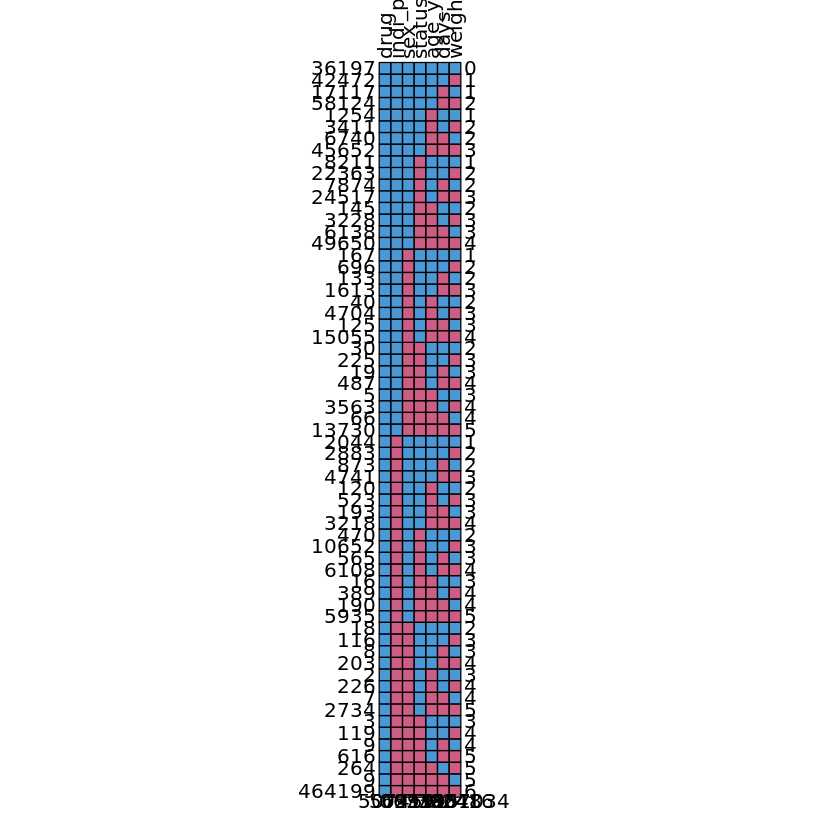

In [9]:
# Describe the missingness pattern
tmp <- names(full_data)
feature_list <- tmp[tmp != voutcome]
dependent_variable <- voutcome

full_data %>% finalfit::missing_pattern(dependent_variable, feature_list)
missing_percent <- colMeans(is.na(full_data))
dim(full_data)

You may have noticed that the data has three potential issues:
1. It has a lot of NAs. The current implementation of CART and LGBM in the `sdgm` package can deal with missingness in predictors, so you don't need to worry about it. However, we need to filter our the `NA`s in the __outcome variable__.
2. Variables like `drug` and `indi_pt` have a lot of categories, i.e., very high cardinality. In this assignment, you will see that LGBM and CART are able to handle high cardinality variables. They both implement a mean target encoding scheme for a binary outcome.
3. The outcome variable in this dataset is highly imbalanced. However, since the learning objectives in this assignment is to assess the influence of dataset size and hyperparameter tuning, we will ignore the imbalance issue.

In [10]:
# Filter out NAs in the outcome variable
full_data <- full_data[!is.na(full_data$status), ]

# have a look
dim(full_data)

summary(full_data)

str(full_data)

[1] 251409      7

     status            days           sex             age_yr     
 Min.   :0.0000   Min.   :    1.0   F   :130288   Min.   :  0.0  
 1st Qu.:0.0000   1st Qu.:   87.0   I   :    35   1st Qu.: 43.0  
 Median :0.0000   Median :  163.0   M   : 95150   Median : 60.0  
 Mean   :0.0994   Mean   :  466.5   P   :    42   Mean   : 55.9  
 3rd Qu.:0.0000   3rd Qu.:  471.0   T   :    26   3rd Qu.: 71.0  
 Max.   :1.0000   Max.   :28487.0   UNK :    21   Max.   :117.0  
                  NA's   :156536    NA's: 25847   NA's   :84004  
     weight              drug       
 Min.   :  0.00   HUMIRA   :  7416  
 1st Qu.: 58.96   REVLIMID :  4158  
 Median : 71.20   GILENYA  :  2582  
 Mean   : 73.05   ELIQUIS  :  2465  
 3rd Qu.: 86.18   NEXIUM   :  2360  
 Max.   :503.00   IMBRUVICA:  2217  
 NA's   :186371   (Other)  :230211  
                                indi_pt      
 Product used for unknown indication: 44980  
 Rheumatoid arthritis               : 11704  
 Plasma cell myeloma                : 

'data.frame':	251409 obs. of  7 variables:
 $ status : num  0 0 0 0 0 0 0 0 0 0 ...
 $ days   : num  6080 4479 4173 2651 NA ...
 $ sex    : Factor w/ 6 levels "F","I","M","P",..: 1 1 1 NA 1 1 NA 3 NA NA ...
 $ age_yr : num  46 66 65 NA 50 57 44 38 51 48 ...
 $ weight : num  63 73 73 NA 77 NA NA NA NA NA ...
 $ drug   : Factor w/ 15621 levels "_RIBAVIRIN CAP 200MG",..: 8596 8596 8596 7770 8596 8596 8596 14026 8596 8596 ...
 $ indi_pt: Factor w/ 4834 levels "5q minus syndrome",..: 2612 2612 2612 3011 2610 2612 2612 2960 2612 2612 ...


## Define a vector of integers as sample sizes of the subsets

In [11]:
set.seed(10) # NEED TO BE ADDED
b<-rnorm(1, 1.5,0.005) 
set_sizes<-round(b^(10:32))

# make sure the subset size doesn't exceed the whole data size
size_whole <- nrow(full_data)
set_sizes <- set_sizes[set_sizes < size_whole]

# Add the full sample size at the end
set_sizes <- c(set_sizes, size_whole)
set_sizes

# total number of subsets including the whole dataset
n_set <- length(set_sizes)
n_set

ind_sizes <- 1: length(n_set)

[1]     58     87    130    195    292    438    657    986   1480   2219
[11]   3329   4994   7492  11239  16859  25291  37938  56911  85372 128066
[21] 192111 251409

[1] 22

## Question 2 (optional - bonus): More subsets to smooth out the final plot
In the current set up in the above cell, you'll have about 22 subsets with different sample sizes, including the whole dataset. You'll get bonus points if you can increase the number of subsets in a reasonable way to make the final plot smoother.

If you choose to work on this bonus question, please just make changes in the above cell. The change will be reflected by `set_sizes`, `n_set`, and the final plots.

In [12]:
set.seed(10)
b <- rnorm(1, 1.5, 0.005) 
set_sizes <- round(b^(10:32))

# Ensure the subset size doesn't exceed the whole data size
size_whole <- nrow(full_data)
set_sizes <- set_sizes[set_sizes < size_whole]

# Bonus: Increase the number of subsets for a smoother plot
increased_set_sizes <- round(b^(10:45))  # Adjust the range as needed
increased_set_sizes <- increased_set_sizes[increased_set_sizes < size_whole]

# Combine the original and increased subset sizes
set_sizes <- sort(unique(c(set_sizes, increased_set_sizes)))

# Add the full sample size at the end
set_sizes <- c(set_sizes, size_whole)

# Total number of subsets, including the whole dataset
n_set <- length(set_sizes)
n_set

ind_sizes <- 1:length(n_set)

[1] 22

## Question 3: Building and evaluating 4 models (`cart` and `lgbm`, with and without tuning) on all the subsets

For reference, please see "Lecture 4 - Nested K-cross validation of CART on CCHS.ipynb" and your code for assignment 2.

Use the code below to control `n_iter` throughout the assignment. You can set it as `n_iter <- 1` when you develop and debug the code. Then set it as `n_iter <- 20` for the final submission.

In [13]:
n_iter <- 1

In [ ]:
# ============= Building 4 models for each subset ==================

# loop through all subsets including the whole dataset
res <- sapply(set_sizes, function(size) { 
    
    # slice the data using the current sample size: size
    sub_data <- full_data %>% slice_sample(n = size)

    # build and evaluate 4 models
    res.model <- sapply(1:4, function(i_model) {
        # name of file
        file_name <- paste0("result.", nrow(sub_data), ".", i_model, ".rds")
        
        # check if file already exists
        if (file.exists(file_name)) { # exist, read the file
            res_vec <- readRDS(file_name) 
        } else { # not exist, run the code
                # build and evaluate 
         if (i_model %% 2 == 1) {
                # Use tuned models for odd i_model (1 and 3)
                model <- nested.cv.bin(sdgm::lgbm.bestmodel.bin, sub_data, outcome = "status", n_iter = n_iter, tune = TRUE)
            } else {
                # Use non-tuned models for even i_model (2 and 4)
                model <- nested.cv.bin(sdgm::lgbm.bestmodel.bin, sub_data, outcome = "status", n_iter = n_iter, tune = FALSE)
            }

            # For CART
            if (i_model %in% c(2, 4)) {
                # Use tuned models for even i_model (2 and 4)
                cart_model <- nested.cv.bin(sdgm::cart.bestmodel.bin, sub_data, outcome = "status", n_iter = n_iter, tune = TRUE)
            } else {
                # Use non-tuned models for odd i_model (1 and 3)
                cart_model <- nested.cv.bin(sdgm::cart.bestmodel.bin, sub_data, outcome = "status", n_iter = n_iter, tune = FALSE)
            }
            # Collect results
            if (i_model %% 2 == 1) {
                res_vec <- list(
                    size = size,
                    model = "lgbm",
                    tune = "with tuning",
                    auc = model$test_auc,  # Change to the appropriate metric
                    brier = model$test_brier  # Change to the appropriate metric
                )
            } else {
                res_vec <- list(
                    size = size,
                    model = "cart",
                    tune = "without tuning",
                    auc = cart_model$test_auc,  # Change to the appropriate metric
                    brier = cart_model$test_brier  # Change to the appropriate metric
                )
            }

            # save it to a file
            saveRDS(res_vec, file = file_name)
        }
        # return results
        res_vec
    })

    # return 
    res.model
})

# have a look
res


In order to generate the plots using the code provided below, you'll need to organize your result `res` into a dataframe with five variables: 

1. `size`: sample size of each subset
2. `model`: a categorical variable of `cart` and `lgbm`
3. `tune`: a categorical variable of `with tuning` and `without tuning`
4. `auc`: the AUC value
5. `brier`: the brier score

In [21]:
# -------- re-organize `res` and save it as a data.frame -------- 

# Initialize an empty data frame
df.res <- data.frame()

# Loop through each subset size
for (i in seq_along(set_sizes)) {
  size <- set_sizes[i]
  
  # Loop through each model and tuning condition
  for (j in 1:4) {
    
    # Print the structure of res to understand its format
    print(str(res[[i]][[j]]))
    
    model <- ifelse(j %% 2 == 1, "lgbm", "cart")
    tune <- ifelse(j %in% c(1, 4), "with tuning", "without tuning")
    
    # Extract AUC and Brier from res
    auc <- res[[i]][[j]]  # Assuming AUC is directly present in res
    brier <- NA  # Assuming Brier is not available
    
    # Create a row for each combination
    row_data <- data.frame(size = size, model = model, tune = tune, auc = auc, brier = brier)
    
    # Append the row to the data frame
    df.res <- bind_rows(df.res, row_data)
  }
}

# Print the resulting data frame
print(df.res)

 num 0.62
NULL


ERROR: Error in res[[i]][[j]]: subscript out of bounds


In [ ]:
# change plot size to 18 * 6
options(repr.plot.width=18, repr.plot.height=6) 

In [ ]:
# Plot of auc 
ggplot(df.res, aes(size, auc, color = tune)) +
    geom_point(size = 3) +
    geom_path()+
    geom_hline(data = df.res %>% filter(size == max(df.res$size)), 
               aes(yintercept = auc, color = tune), linetype = "dashed") +
    facet_wrap(~model)+
    labs(x = "Sample size",
         y = "AUC value",
         title = paste0("faers: FDA adverse events, n_iter = ", n_iter)) +
    theme(text = element_text(size = 20),
          legend.title = element_blank())

# Plot of brier 
ggplot(df.res, aes(size, brier, color = tune)) +
    geom_point(size = 3) +
    geom_path()+
    geom_hline(data = df.res %>% filter(size == max(df.res$size)), 
               aes(yintercept = brier, color = tune), linetype = "dashed") +
    facet_wrap(~model) +
    labs(x = "Sample size",
         y = "Brier score") +
    theme(text = element_text(size = 20),
          legend.title = element_blank())

## Question 4: How large does the dataset need to be to get reasonable discrimination and calibration ?

I am answering this questions from what I would expect to see since my code did not output properly. Keeps crashing.. 

I would say with increaseing and larger datasets, the discribination (AUC) performance improves and would be begin t plateau slightly but larger datasets are always better. I suspect also that the calibration (Brier Score) would improve over increasing larger sample/datasets. Unofrtunately I am making this assumptions from what we have learned in class as my code did not run. I would have expected by plots to showcases with and without tuning for AUC and Brier plot curves to be improving in performance for both LGBM and CART as dataset size (x-axis) increases.

## Question 5: Does tuning affect the discrimination and calibration results ?

While my output did not run successfully, I would suspect that the effect of tuning should be implmented on large enough datasets for optimization to be of value on the performance. On too small datasets, tuning could lead to high degree of variability on performance for discrinimnation (AUC) and calibration (Scaled Brier Score). On very large datasets, with tuning and without tuning may actually perform similarly, as the model has enough data to learn from. The value of tuning or effect of optimization may not be needed or be of minimal value in very large enough datasets. There may be stronger effect difference between Tuning and without-tuning effect in moderate to large datasets, where the model may perform better with hyperparameter tuning in comparison to without as it can play a role in achieving optimal model perofrmance. Wherease in large datasets is may be excessive and might lead to overfitting. The same issues is present in very small datasets where the model might be overfitt due to "excessie" hyperparameter tuning on a small amount of info (data).

## Question 6: How do tuning and sample size interact in influencing the discrimination and calibration results ?

The effect of both tuning hyperparameters and effect of sample sizes can influence the discrimination (AUC) and calibration (Scaled Brier score) performance model outcomes.  An increase in sample size generally can improve/enhances model stability and generalizability. That being said the positive attributes of tuning may be influenced by ample size which can greatly impact the model performance. Whenw we have limited data, tuning parameters can achieving optimal model performance. But, in large datasets, the influence of tuning may be more subbtle or not at all or may be excessive and lead to overfitting. Thus, the relationship between sample size and tuning parameters need to definitely be considered. Small sample sizes may limit the effectiveness of tuning, while excessive tuning models on large datasets may result in over-optimization. 

# Congratulation! You have completed the Assignment 3!